In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set up connection to the database
conn = psycopg2.connect(
    host="localhost",
    database="ecom",
    user="postgres",
    password="Daddy1995!")


In [3]:
# SQL query to retrieve data from the table
query = "SELECT * FROM ecommerce_cb;"

In [4]:
# Use pandas to read the data into a dataframe
df = pd.read_sql(query, conn)

In [5]:
df

,com_id,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients
1,1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree
2,2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter
3,3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables
4,4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables
2019497,2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water
2019498,2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce
2019499,2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce


In [6]:
#Maps the integer values of days of the week 
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

#Replace the numerical values of the 'order_dow' and 'days_since_prior_order' columns in the pandas DataFrame 'df
df['order_dow'] = df['order_dow'].replace(day_mapping)
df['days_since_prior_order'] = df['days_since_prior_order'].replace(day_mapping)


In [7]:
#Print Dataframe (df)
df

,com_id,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,0,2425083,49125,1,Tuesday,18,Sunday,17,1,0,13,pantry,baking ingredients
1,1,2425083,49125,1,Tuesday,18,Sunday,91,2,0,16,dairy eggs,soy lactosefree
2,2,2425083,49125,1,Tuesday,18,Sunday,36,3,0,16,dairy eggs,butter
3,3,2425083,49125,1,Tuesday,18,Sunday,83,4,0,4,produce,fresh vegetables
4,4,2425083,49125,1,Tuesday,18,Sunday,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,2019496,3390742,199430,16,Wednesday,18,Friday,83,8,0,4,produce,fresh vegetables
2019497,2019497,458285,128787,42,Tuesday,19,Wednesday,115,1,1,7,beverages,water seltzer sparkling water
2019498,2019498,458285,128787,42,Tuesday,19,Wednesday,32,2,1,4,produce,packaged produce
2019499,2019499,458285,128787,42,Tuesday,19,Wednesday,32,3,1,4,produce,packaged produce


In [8]:
#Create four time frame based on the hour of the day. 

morning_mask = (df['order_hour_of_day'] >= 5) & (df['order_hour_of_day'] < 12)
afternoon_mask = (df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] < 17)
evening_mask = (df['order_hour_of_day'] >= 17) & (df['order_hour_of_day'] < 21)
night_mask = (df['order_hour_of_day'] >= 21) | (df['order_hour_of_day'] < 5)

#locate the rows that match each boolean mask and assign the corresponding time frame label to the 'time_frame' column
df.loc[morning_mask, 'time_frame'] = 'Morning 05:00-11:59'
df.loc[afternoon_mask, 'time_frame'] = 'Afternoon 12:00-16:59'
df.loc[evening_mask, 'time_frame'] = 'Evening 17:00-20:59'
df.loc[night_mask, 'time_frame'] = 'Night 21:00-04:59'

#groups the data in the pandas DataFrame 'df' by the day of the week ('order_dow') and the time frame ('time_frame') columns, and then counts the number of orders ('order_id') within each group
timeframe = df.groupby(['order_dow', 'time_frame'])['order_id'].count().reset_index()

#Specify the order of categories 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_order = ['Morning 05:00-11:59', 'Afternoon 12:00-16:59', 'Evening 17:00-20:59', 'Night 21:00-04:59']

#Allows the data in these columns to be sorted in a custom order specified by the 'day_order' and 'time_order' lists.
timeframe['order_dow'] = pd.Categorical(timeframe['order_dow'], categories=day_order, ordered=True)
timeframe['time_frame'] = pd.Categorical(timeframe['time_frame'], categories=time_order, ordered=True)

#sort the DataFrame by the 'order_dow' and 'time_frame' columns, in that order
timeframe = timeframe.sort_values(['order_dow', 'time_frame'])

#print
timeframe

,order_dow,time_frame,order_id
6,Monday,Morning 05:00-11:59,130332
4,Monday,Afternoon 12:00-16:59,137957
5,Monday,Evening 17:00-20:59,59382
7,Monday,Night 21:00-04:59,21565
22,Tuesday,Morning 05:00-11:59,88526
20,Tuesday,Afternoon 12:00-16:59,103813
21,Tuesday,Evening 17:00-20:59,51077
23,Tuesday,Night 21:00-04:59,18496
26,Wednesday,Morning 05:00-11:59,78385
24,Wednesday,Afternoon 12:00-16:59,96083


In [9]:
#Rename the 'order_dow' column to 'DayOfWeek' 
timeframe = timeframe.rename(columns={'order_dow': 'DayOfWeek'})

#Pivot table aggregates the count of orders in each time frame for each day of the week
pivot = pd.pivot_table(timeframe, values='order_id', index='DayOfWeek', columns='time_frame', aggfunc=sum, margins=True, margins_name='Total')

#Pivot table is stored in a new DataFrame called 'df_pivot',
df_pivot = pd.DataFrame(pivot.to_records())

#Hide index number
df_pivot.style.hide_index()

DayOfWeek,Morning 05:00-11:59,Afternoon 12:00-16:59,Evening 17:00-20:59,Night 21:00-04:59,Total
Monday,130332,137957,59382,21565,349236
Tuesday,88526,103813,51077,18496,261912
Wednesday,78385,96083,46722,17540,238730
Thursday,75266,91827,48189,19602,234884
Friday,90614,104468,48585,18490,262157
Saturday,91062,117003,51078,21608,280751
Sunday,124582,171971,67392,27886,391831
Total,678767,823122,372425,145187,2019501


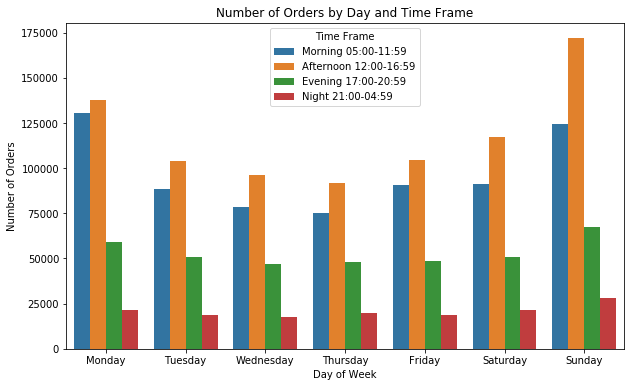

In [10]:
#Create bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x="DayOfWeek", y="order_id", hue="time_frame", data=timeframe)
plt.title("Number of Orders by Day and Time Frame")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.legend(title="Time Frame")
plt.show()

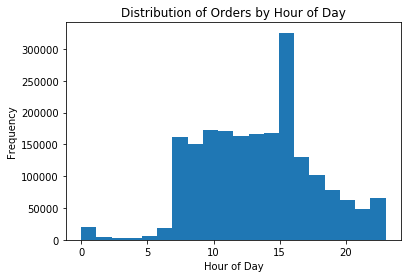

In [11]:
#Create Histogram of orders by hour of day
plt.hist(df['order_hour_of_day'], bins=20)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Orders by Hour of Day')
plt.show()

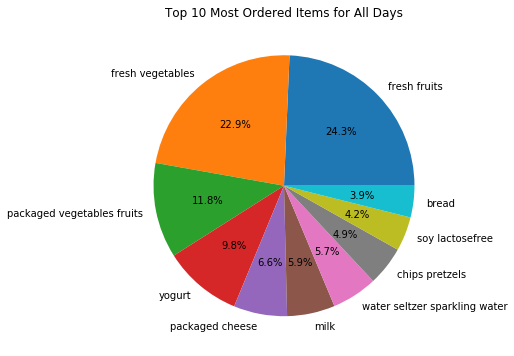

In [13]:
#Create Pie chart of top 10 most ordered items for all days
top10 = df['product_name'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
plt.pie(top10, labels=top10.index, autopct='%1.1f%%')
plt.title("Top 10 Most Ordered Items for All Days")
plt.show()

In [14]:
#creates a list of weekdays 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#DataFrame is grouped by the 'order_dow' (day of the week) and 'order_hour_of_day' columns, and the 'count' function is used to aggregate the number of orders in each group
orders_by_day_hour = df.groupby(['order_dow', 'order_hour_of_day']).agg({'order_id': 'count'}).reset_index()
#Rename Column
orders_by_day_hour = orders_by_day_hour.rename(columns={'order_dow': 'Day of Week', 'order_hour_of_day': 'Hour of Day', 'order_id': 'Number of Orders'})

# convert the 'Day of Week' column to a categorical variable with the desired order
orders_by_day_hour['Day of Week'] = pd.Categorical(orders_by_day_hour['Day of Week'], categories=days_order, ordered=True)

# sort the dataframe by the categorical 'Day of Week' variable and reset the index
orders_by_day_hour = orders_by_day_hour.sort_values('Day of Week').reset_index(drop=True)

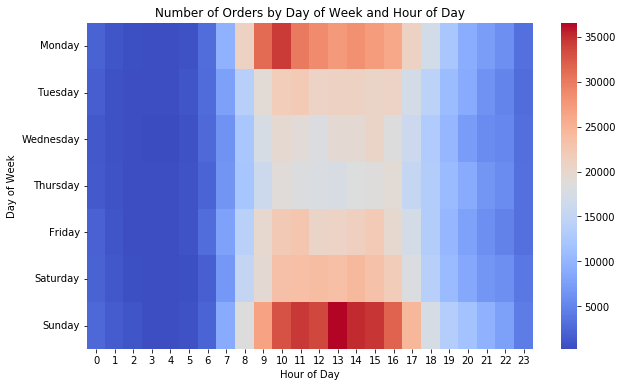

In [15]:
# dataframe is being pivoted so that the rows represent the days of the week, the columns represent the hours of the day, and the values represent the number of orders.
orders_by_day_hour_pivot = orders_by_day_hour.pivot(index='Day of Week', columns='Hour of Day', values='Number of Orders')

# Set up the figure size and the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(orders_by_day_hour_pivot, cmap='coolwarm')

# Set the axis labels and the title
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Number of Orders by Day of Week and Hour of Day')

# Show the plot
plt.show()

In [16]:
#grouping the orders by day of the week and hour of the day, and counting the number of orders
orders_by_hour = df.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()
#Rename column
orders_by_hour = orders_by_hour.rename(columns={'order_id': 'number_of_orders'})

# Set the categories and sort order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_hour['order_dow'] = pd.Categorical(orders_by_hour['order_dow'], categories=day_order, ordered=True)

# Set the categories and sort order for hours of the day
hour_order = [i for i in range(24)]
orders_by_hour['order_hour_of_day'] = pd.Categorical(orders_by_hour['order_hour_of_day'], categories=hour_order, ordered=True)

# Reshape the dataframe to have days of the week as rows and hours of the day as columns
orders_by_hour = orders_by_hour.pivot(index='order_dow', columns='order_hour_of_day', values='number_of_orders')
orders_by_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
Monday,2100,1095,621,510,510,741,3072,9734,21040,31299,...,28273,27328,26225,21013,16979,12226,9164,7430,6026,3273
Tuesday,1739,800,430,459,463,964,2937,7717,13765,19217,...,20952,20499,20774,17114,14318,10858,8787,6463,5071,3071
Wednesday,1389,783,530,254,342,776,2747,6430,12320,17447,...,19460,20525,18524,16102,13073,10273,7274,5785,5332,3125
Thursday,1490,834,534,441,526,928,2365,6600,12090,16198,...,18351,18641,19253,15343,13413,10658,8775,6763,5750,3264
Friday,1977,977,513,425,497,952,2961,7917,13903,19804,...,21298,22133,19771,17109,13335,10252,7889,5954,4881,3266
Saturday,2126,1176,618,490,493,665,1909,6847,15164,19523,...,24241,23348,21924,18070,13771,10711,8526,6739,5990,3976
Sunday,2660,1618,964,415,438,706,2302,8898,18472,26760,...,35256,34683,31776,24632,17527,13538,11695,9723,7712,4356


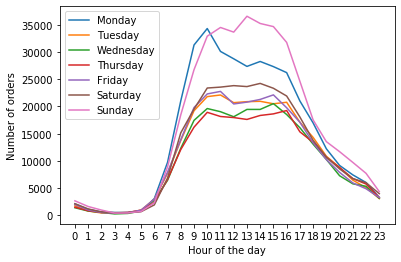

In [17]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_hour.index = pd.Categorical(orders_by_hour.index, categories=day_order, ordered=True)

# Create a line plot for each day of the week
for day in day_order:
    plt.plot(orders_by_hour.loc[day], label=day)

# Set the x-axis and y-axis labels
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.xticks(range(24))
plt.legend()

# Show the plot
plt.show()

In [18]:
conn.close()